<h2>Loading Data & Importing Libraries </h2>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [10]:
# Looking at the columns
print("Columns:-> ", train.columns)
print("\nNumber of Columns: ", len(train.columns))
print("Number of Rows: ", len(train))

Columns:->  Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond',

In [11]:
# Looking at the Categorical variables
train.dtypes[train.dtypes == 'object'].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
#Looking at Numerical Variables
numerical_variables = train.dtypes.loc[train.dtypes  !='object'].index
print(numerical_variables)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [14]:
#Looking at first few rows
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<p style="color:red;">Important variables for analysis (Selected through means of Self Analysis)</p>

<ul style="color:red;">
	<li>OverallQual (Categorical)</li>
	<li>YearBuilt (Categorical)</li>
	<li>TotalBsmtSF (Numerical)</li>
	<li>GrLivArea (Numerical)</li>
    <li>Neighborhood (categorical) </li>
    
</ul>

<h2>Univariate Analysis</h2>

In [33]:
#analyzing sales
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

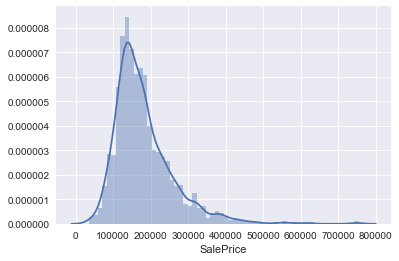

In [35]:
####################################################
# --- Looking at the Distribution of 'SalePrice' ---
####################################################
x=train['SalePrice']
sns.distplot(x,kde=True,bins=60)

<p style="color:red">###-> What we can infer from this plot:-</p>
<ul style="color:red">
	<li>Deviates from Normal Distribution</li>
	<li>Have positive skewness</li>
	<li>Show peakedness</li>
</ul>

In [37]:
# Skewness and Kurtosis

print("Skewness:", train['SalePrice'].skew())
print("Kurtosis:", train['SalePrice'].kurt())

Skewness: 1.88287575977
Kurtosis: 6.53628186006


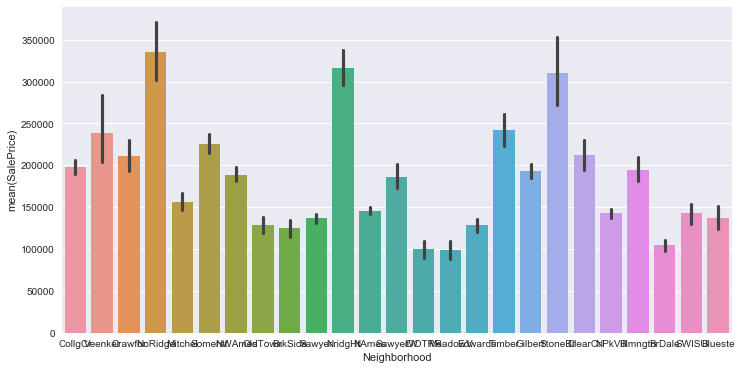

In [43]:
#analyzing Neighbourhood with Sale Price
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Neighborhood', y = 'SalePrice',  data = train)

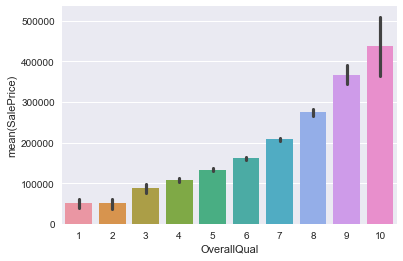

In [44]:
#Analyzing Overall Quality
sns.barplot(x='OverallQual',y='SalePrice',data=train)

<p>Sale Price increases with Overall Quality</p>

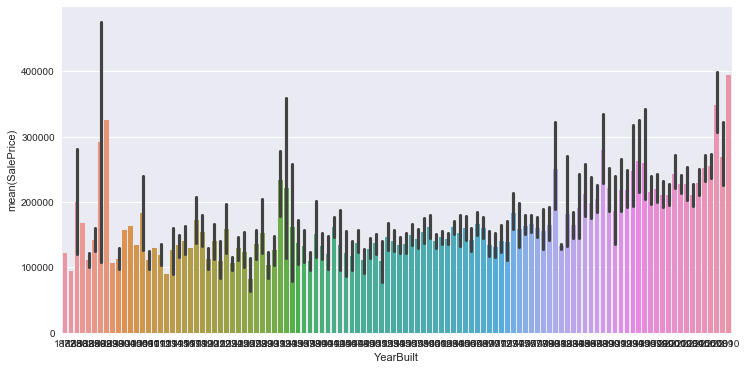

In [46]:
#Analyzing Overall Quality
plt.figure(figsize = (12, 6))
sns.barplot(x='YearBuilt',y='SalePrice',data=train)

<p>Sale Price tends to increase with year built but not a strong one</p>

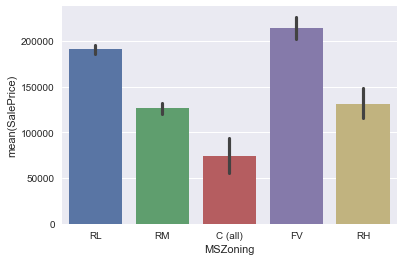

In [50]:
#Analyzing Zoning
sns.barplot(x = 'MSZoning', y = 'SalePrice', data = train)

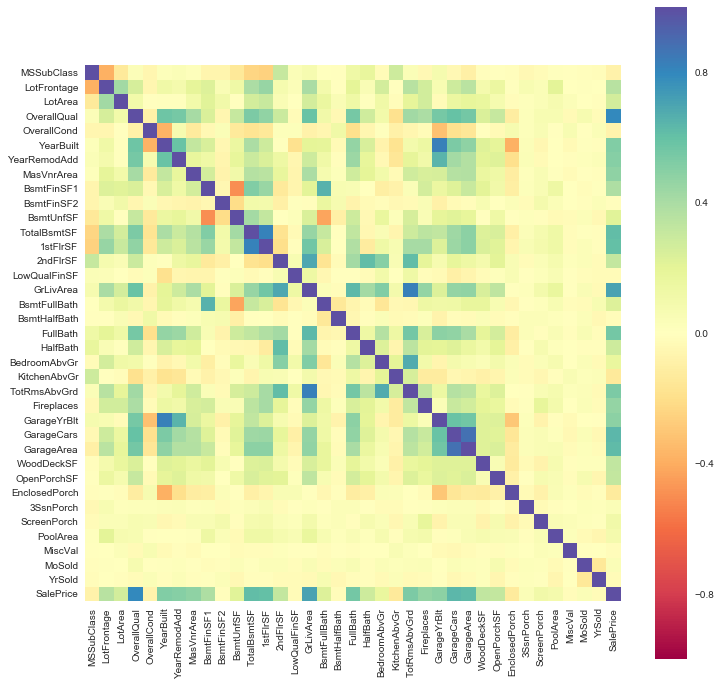

In [58]:
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr,vmax=1,square=True,annot=False,cmap='Spectral')

In [56]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict['SalePrice']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCon

<p>
<ul>
		<li>'GrLivArea', 'OverallQual and 'TotalBsmtSF' are strongly related with 'SalePrice'. 
        </li>
        <li>
			'GarageCars' and 'GarageArea' are also related. Out of these we can keep 'GarageCars'.
		</li>
        <li>
			'1stFlrSF' is correlated but is infact the consequence of 'TotalBsmtSF'. So we'll neglect it
		</li>
         <li>
			'YearBuilt' is not strongly correlated but we'll keep it for further analysis
		</li>
    </ul>
</p>

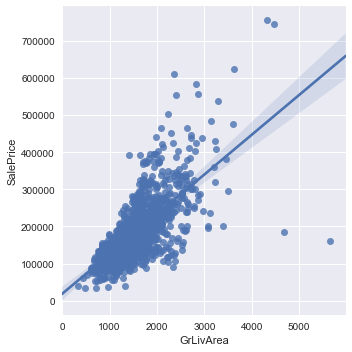

In [62]:
#Analyzing Sale Price with above grund floor living area
sns.lmplot(x='GrLivArea',y='SalePrice',data=train)

<p>looks like a linear relationship among GrLivArea and SalePrice</p>

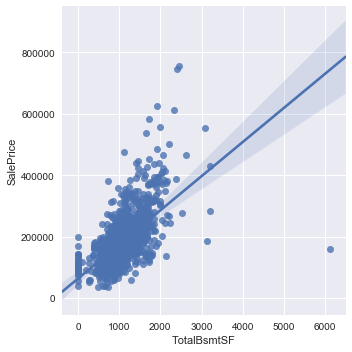

In [63]:
#Analyzing Sale Price with above Basement area
sns.lmplot(x='TotalBsmtSF',y='SalePrice',data=train)

<p>looks like a linear till approx. 3000 sq feet and then closes off</p>

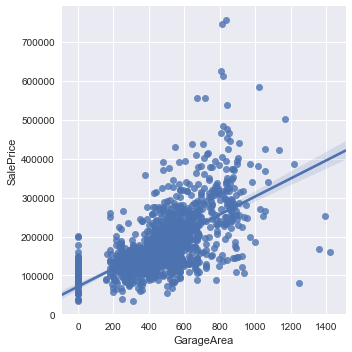

In [65]:
#Analyzing Sale Price with above Garage area
sns.lmplot(x='GarageArea',y='SalePrice',data=train)

<h2>Missing Value Treatment</h2>

In [68]:
#######################################
# --- Missing Data with Percentages ---
#######################################

total = train.isnull().sum().sort_values(ascending=False)
percent = round(train.isnull().sum()/train.isnull().count() * 100, 2).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [70]:
#data description says NA means "No Pool". That make sense, given the huge ratio of missing value 
#(+99%) and majority of houses have no Pool at all in general
train["PoolQC"] = train["PoolQC"].fillna("None")

In [72]:
#data description says NA means "no misc feature"
train["MiscFeature"] = train["MiscFeature"].fillna("None")

In [75]:
#data description says NA means "no alley access"
train["Alley"] = train["Alley"].fillna("None")

In [76]:
#data description says NA means "no fence"
train["Fence"] = train["Fence"].fillna("None")

In [77]:
#data description says NA means "no fireplace"
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")

In [78]:
#LotFrontage : Since the area of each street connected to the house property most
#likely have a similar area to other houses in its neighborhood
#we can fill in missing values by the median LotFrontage of the neighborhood.
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [80]:
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')

In [82]:
#GarageYrBlt, GarageArea and GarageCars :
#Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)

In [83]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath :
#missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath'):
    train[col] = train[col].fillna(0)

In [84]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : 
#For all these categorical basement-related features, NaN means that there is no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')

In [85]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses
#We can fill 0 for the area and None for the type.
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

In [86]:
#MSZoning (The general zoning classification) : 
#'RL' is by far the most common value. So we can fill in missing values with 'RL'
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

In [87]:
#Utilities For this categorical feature all records are "AllPub", except for one "NoSeWa" & 2 NA 
#Since the house with 'NoSewa' is in the training set this feature won't help in predictive modelling
#We can then safely remove it.
train= train.drop(['Utilities'], axis=1)

In [88]:
#Functional : data description says NA means typical
train["Functional"] = train["Functional"].fillna("Typ")

In [89]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr',
#we can set that for the missing value.
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [90]:
#KitchenQual: Only one NA valuewe set 'TA' (which is the most frequent) 
#for the missing value in KitchenQual.
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

In [91]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. 
#We will just substitute in the most common string
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

In [92]:
#SaleType : Fill in again with most frequent which is "WD"
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])

In [94]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None
train['MSSubClass'] = train['MSSubClass'].fillna("None")

<h2>Outlier Detection & Removal</h2>

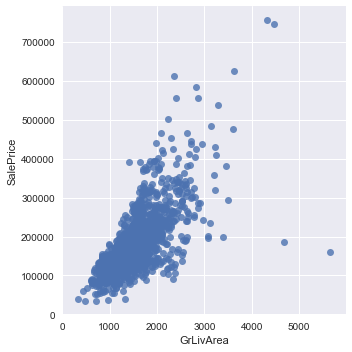

In [97]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=train, fit_reg=False)

<p> two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.
</p>

In [99]:
#train[(train['SalePrice'] < 200000) & (train['GrLivArea'] > 4000)][['GrLivArea', 'SalePrice']]
#index = id+1(bcoz in python it starts from 0 not 1)
train = train.drop(labels=train[train['Id'] == 1299].index)
train = train.drop(labels=train[train['Id'] == 524].index)

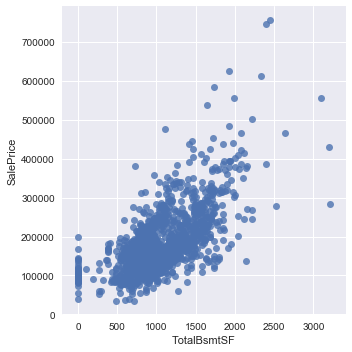

In [102]:
sns.lmplot(x="TotalBsmtSF", y="SalePrice", data=train, fit_reg=False)

<p>
Here there are some extremely high values (>3000) of TotalBsmtSF, But its hard to exclude them for outliers as they are kind of following the trend.
</p>

<h2>Variable Transformation</h2>

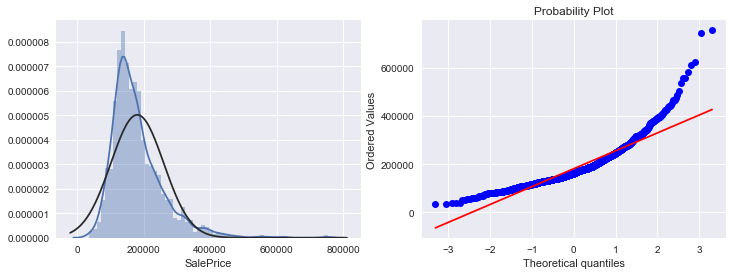

In [128]:
#Looking at the Distribution and Normal Probability Plot of 'SalePrice'
x=train['SalePrice']
f, ax = plt.subplots(nrows=1, ncols=2)
f.set_figheight(4)
f.set_figwidth(12)
sns.distplot(x, bins=60, fit=norm, ax=ax[0])
stats.probplot(x, plot=ax[1])
plt.show()

<p>
SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.<br>
you can learn in statistical books: in case of positive skewness, log transformations usually works well
</p>

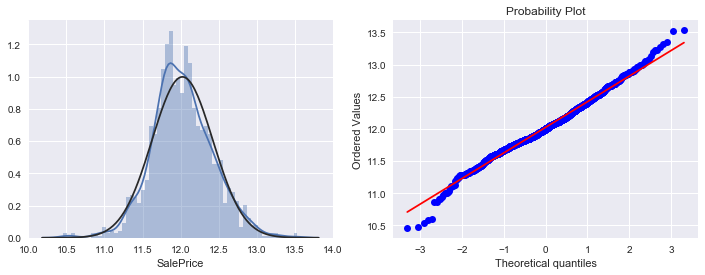

In [129]:
train['SalePrice'] = np.log(train['SalePrice'])
# Looking at the transormed plots
f, ax = plt.subplots(nrows=1, ncols=2)
f.set_figheight(4)
f.set_figwidth(12)
x = train['SalePrice']
sns.distplot(x, bins=60, fit=norm, ax=ax[0])
stats.probplot(x, plot=ax[1])
plt.show()

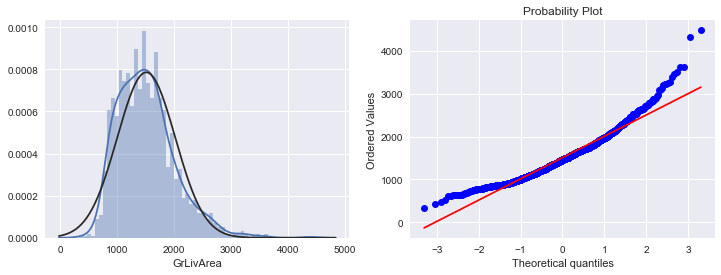

In [130]:
# --- Looking at the Distribution and Normal Probability Plot of 'GrLivArea' 
f, ax = plt.subplots(nrows=1, ncols=2)
f.set_figheight(4)
f.set_figwidth(12)
x = train['GrLivArea']

sns.distplot(x, bins=60, fit=norm, ax=ax[0])

stats.probplot(x, plot=ax[1])

plt.show()

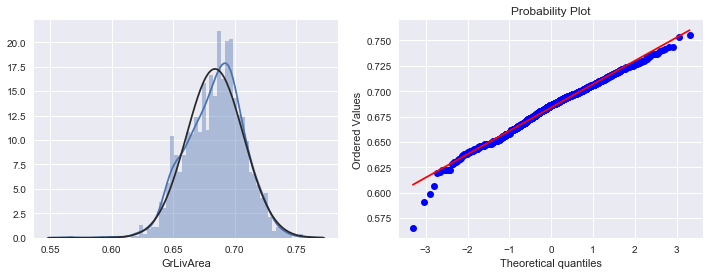

In [133]:
# --- Applying the Log Transformation ---
train['GrLivArea'] = np.log(train['GrLivArea'])

# Looking at the transormed plots
f, ax = plt.subplots(nrows=1, ncols=2)
f.set_figheight(4)
f.set_figwidth(12)

x = train['GrLivArea']

sns.distplot(x, bins=60, fit=norm, ax=ax[0])

stats.probplot(x, plot=ax[1])

plt.show()

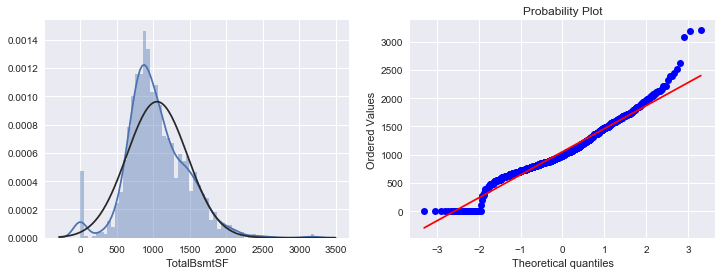

In [135]:
# --- Looking at the Distribution and Normal Probability Plot of 'TotalBsmtSF' ---

f, ax = plt.subplots(nrows=1, ncols=2)
f.set_figheight(4)
f.set_figwidth(12)

x =train['TotalBsmtSF']

sns.distplot(x, bins=60, fit=norm, ax=ax[0])

stats.probplot(x, plot=ax[1])

plt.show()

<p>
there are many values that have value 0 which represent houses without basement
problem arises because the value zero doesn't allow us to do log transformations.
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.</p>

In [136]:
# Creating a column for our binary variable (Has_Basement which would be 0 or 1)
train['HasBsmt'] = pd.Series(data=train['TotalBsmtSF'], index=train.index)

train['HasBsmt'] = 0

train.loc[train['TotalBsmtSF'] > 0, 'HasBsmt']  = 1

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


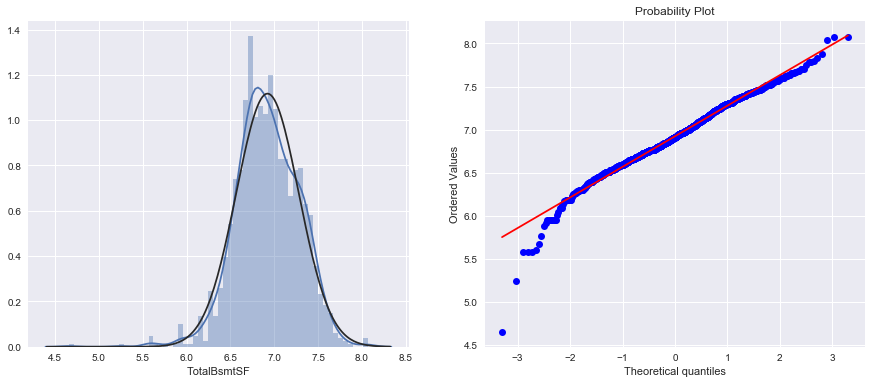

In [137]:
# --- Applying the Log Transformation ---
train.loc[train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
# Looking at the transormed plots

f, ax = plt.subplots(nrows=1, ncols=2)
f.set_figheight(6)
f.set_figwidth(15)

x = train[train['TotalBsmtSF'] > 0]['TotalBsmtSF']

sns.distplot(x, bins=60, fit=norm, ax=ax[0])

stats.probplot(x, plot=ax[1])

plt.show()